# Task 4:- SENTIMENT ANALYSI USING NLP TECHNIQUES.


In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk tensorflow

### Install Required Libraries

In [2]:
# ==================== Import Libraries ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download NLTK Stopwords

In [3]:
# ==================== Download NLTK Stopwords ====================
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Dataset

In [4]:
# ==================== Load the Dataset ====================
df = pd.read_csv('Stock data.csv', encoding='ISO-8859-1', header=None)
df.columns = ['Sentiment', 'Text']

In [5]:
df.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
# ==================== Preprocess Text ====================

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Text'] = df['Text'].apply(preprocess_text)


In [7]:
# ====================  Encode Sentiment Labels ====================
encoder = LabelEncoder()
df['Encoded_Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [8]:
# ====================  Vectorization for Naive Bayes & Logistic Regression ====================
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Encoded_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

### **Naive Bayes**

In [9]:
# ====================  Naive Bayes ====================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [10]:
print("\n Naive Bayes Report:\n")
print(classification_report(y_test, nb_pred, target_names=encoder.classes_))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


 Naive Bayes Report:

              precision    recall  f1-score   support

    negative       0.60      0.58      0.59       110
     neutral       0.76      0.83      0.80       571
    positive       0.64      0.53      0.58       289

    accuracy                           0.71       970
   macro avg       0.67      0.65      0.66       970
weighted avg       0.71      0.71      0.71       970

Naive Bayes Accuracy: 0.7144329896907217


### **Logistic Regression**

In [11]:
# ==================== Logistic Regression ====================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("\n Logistic Regression Report:\n")
print(classification_report(y_test, lr_pred, target_names=encoder.classes_))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


 Logistic Regression Report:

              precision    recall  f1-score   support

    negative       0.72      0.55      0.63       110
     neutral       0.78      0.89      0.83       571
    positive       0.72      0.57      0.64       289

    accuracy                           0.76       970
   macro avg       0.74      0.67      0.70       970
weighted avg       0.75      0.76      0.75       970

Logistic Regression Accuracy: 0.7597938144329897


In [12]:
# ==================== Prepare Data for LSTM ====================
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Cleaned_Text'])
X_seq = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X_pad = pad_sequences(X_seq, maxlen=100)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_pad, y, test_size=0.2, random_state=42)

### **LSTM Model**



In [13]:
# ==================== LSTM Model ====================
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\n🔹 Training LSTM...\n")
model_lstm.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



🔹 Training LSTM...

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.5701 - loss: 0.9898 - val_accuracy: 0.6482 - val_loss: 0.8668
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.6487 - loss: 0.7955 - val_accuracy: 0.6598 - val_loss: 0.7830
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.7483 - loss: 0.6018 - val_accuracy: 0.6778 - val_loss: 0.7353
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.8476 - loss: 0.4017 - val_accuracy: 0.7139 - val_loss: 0.7671
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9147 - loss: 0.2576 - val_accuracy: 0.7229 - val_loss: 0.8524


In [14]:
# ====================  Evaluate LSTM ====================
y_pred_dl = model_lstm.predict(X_test_dl)
y_pred_dl = np.argmax(y_pred_dl, axis=1)

print("\n LSTM Report:\n")
print(classification_report(y_test_dl, y_pred_dl, target_names=encoder.classes_))
print("LSTM Accuracy:", accuracy_score(y_test_dl, y_pred_dl))


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step

 LSTM Report:

              precision    recall  f1-score   support

    negative       0.76      0.48      0.59       110
     neutral       0.75      0.86      0.80       571
    positive       0.64      0.55      0.59       289

    accuracy                           0.72       970
   macro avg       0.72      0.63      0.66       970
weighted avg       0.72      0.72      0.71       970

LSTM Accuracy: 0.722680412371134


### **Result**

In [15]:
# ==================== Compare Results ====================
results = {
    "Model": ["Naive Bayes", "Logistic Regression", "LSTM"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test_dl, y_pred_dl)
    ]
}

results_df = pd.DataFrame(results)
print("\n📊 Comparison of Models:\n")
print(results_df)


📊 Comparison of Models:

                 Model  Accuracy
0          Naive Bayes  0.714433
1  Logistic Regression  0.759794
2                 LSTM  0.722680


Text(0.5, 1.0, 'Naive Bayes')

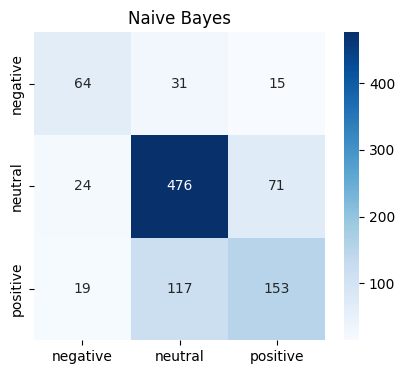

In [16]:
# ==================== Step 14: Confusion Matrix for Visualization ====================
plt.figure(figsize=(16, 4))

# Naive Bayes
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Naive Bayes")


Text(0.5, 1.0, 'Logistic Regression')

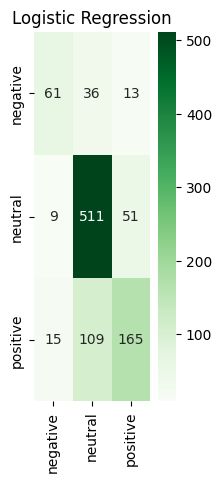

In [17]:

# Logistic Regression
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Greens', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Logistic Regression")


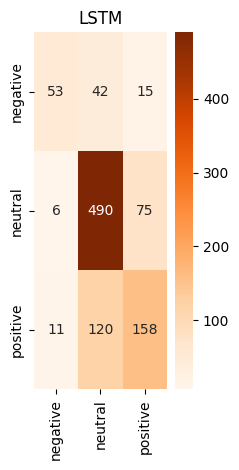

In [18]:
# LSTM
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test_dl, y_pred_dl), annot=True, fmt='d', cmap='Oranges', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("LSTM")

plt.tight_layout()
plt.show()